In [38]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/C2'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"

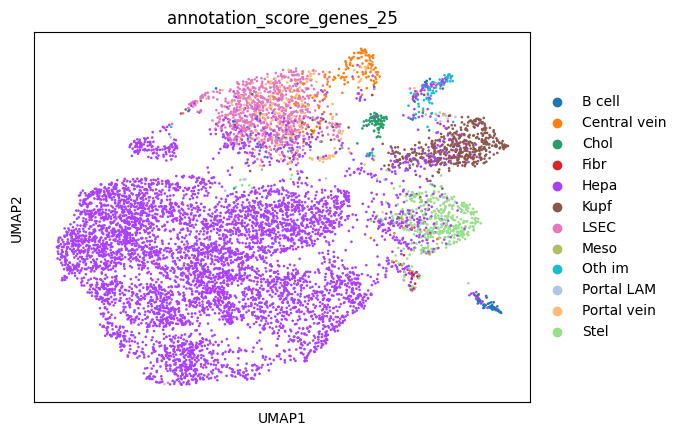

              annotation_score_genes_25
B cell                         1.011527
Central vein                   1.881910
Chol                           0.999765
Fibr                           0.223477
Hepa                          72.371207
Kupf                           5.751588
LSEC                           8.633263
Meso                           0.047048
Oth im                         0.799812
Portal LAM                     0.199953
Portal vein                    2.952247
Stel                           5.128205


In [5]:
# Original score_genes
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [10]:
sdata.table.to_df().columns

Index(['Acta2', 'Adamtsl2', 'Adgre1', 'Adgrg6', 'Atp6v0d2', 'Axl', 'C5ar1',
       'Ccr2', 'Ccr7', 'Cd19', 'Cd207', 'Cd209a', 'Cd36', 'Cd3e', 'Cd5l',
       'Cd79a', 'Cd9', 'Chil3', 'Clec10a', 'Clec4f', 'Clec9a', 'Clic5',
       'Col1a1', 'Colec11', 'Cox6a2', 'Cx3cr1', 'Cxcl12', 'Cyp2e1', 'Dcn',
       'Des', 'Dpt', 'Epcam', 'F13a1', 'Fcgr1', 'Flt3', 'Flt4', 'Fn1', 'Folr2',
       'Gdf15', 'Ghr', 'Gja5', 'Gls2', 'Glul', 'Gpnmb', 'Hal', 'Hgf', 'Igfbp3',
       'Itgae', 'Itgax', 'Itgb7', 'Krt19', 'Lgr5', 'Lhx6', 'Lilra5', 'Lpl',
       'Lyve1', 'Mafb', 'Marco', 'Mfap4', 'Mgl2', 'Mmp12', 'Msln', 'Myh11',
       'Ncam1', 'Ngfr', 'Nrxn1', 'Olfml3', 'Pck1', 'Pdgfra', 'Pdgfrb',
       'Pecam1', 'Plpp1', 'Prox1', 'Reln', 'Rspo3', 'Sds', 'Sept3', 'Siglech',
       'Sirpa', 'Slc40a1', 'Sox9', 'Spn', 'Spon2', 'Spp1', 'Stab2', 'Svep1',
       'Timd4', 'Tmem119', 'Trem2', 'Vsig4', 'Vwf', 'Wnt2', 'Wnt9b', 'Wt1',
       'Xcr1'],
      dtype='object', name='gene')

Hepa            63.914373
LSEC            14.137850
Stel             7.868737
Kupf             5.222301
Central vein     1.552576
Oth im           1.482004
Chol             1.387909
B cell           1.058574
Fibr             0.870383
Portal LAM       0.776288
Unknown          0.717478
Meso             0.588097
Portal vein      0.423430
Name: annotation_own_score_genes, dtype: float64


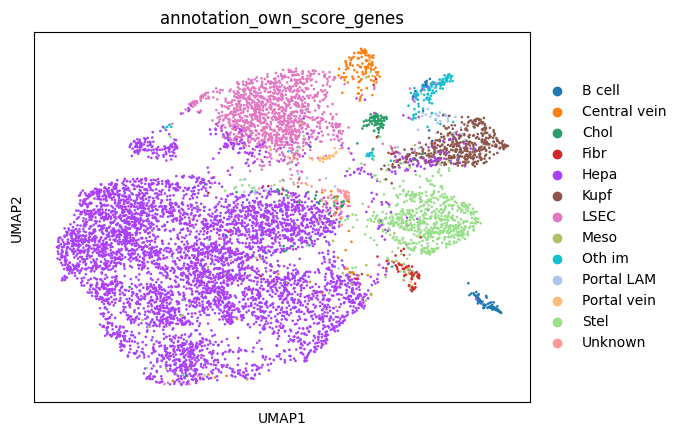

6.363208656786639


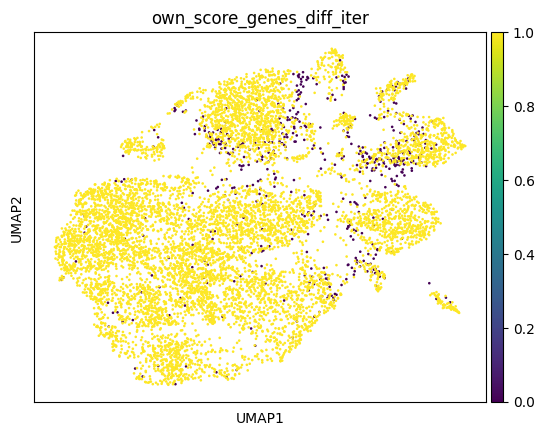

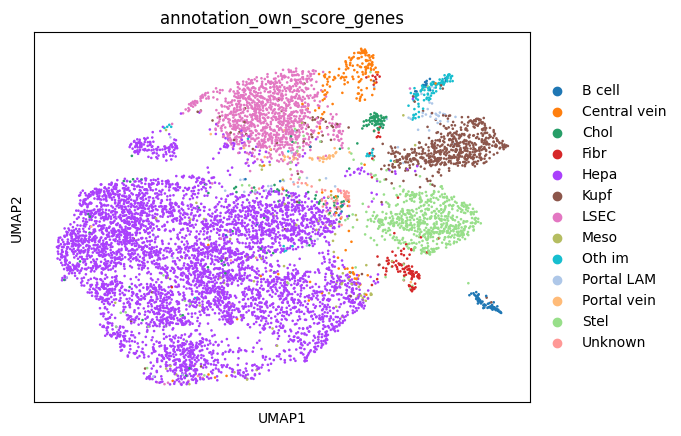

Hepa            60.891555
LSEC            13.514467
Stel             7.504117
Kupf             7.351211
Central vein     2.140673
Chol             1.705481
Fibr             1.387909
Oth im           1.376147
B cell           1.152670
Meso             1.023289
Portal LAM       0.752764
Unknown          0.717478
Portal vein      0.482239
Name: annotation_own_score_genes, dtype: float64
1.1997177134791814


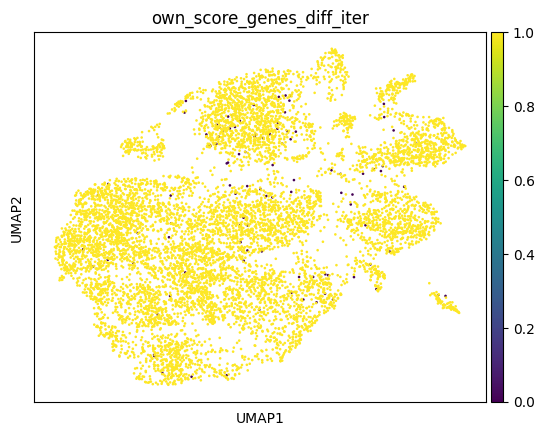

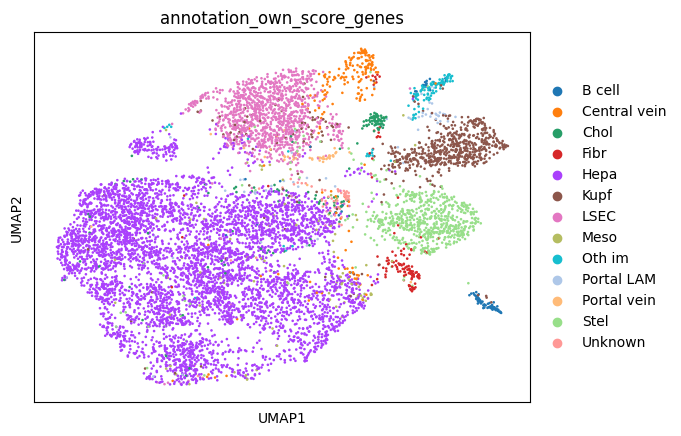

Hepa            60.268172
LSEC            13.326276
Kupf             7.856975
Stel             7.468831
Central vein     2.234768
Chol             1.787815
Fibr             1.493766
Oth im           1.340861
B cell           1.117384
Meso             1.117384
Portal LAM       0.788050
Unknown          0.717478
Portal vein      0.482239
Name: annotation_own_score_genes, dtype: float64
0.29404845918607386


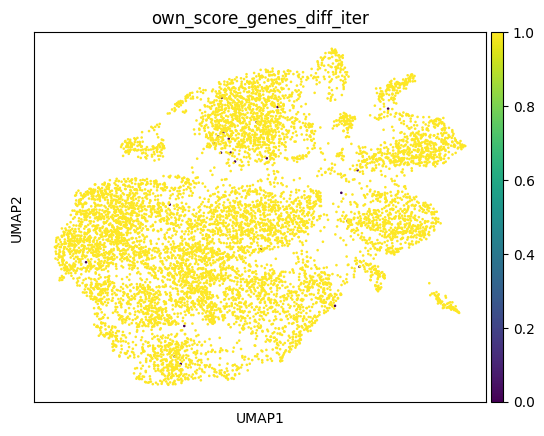

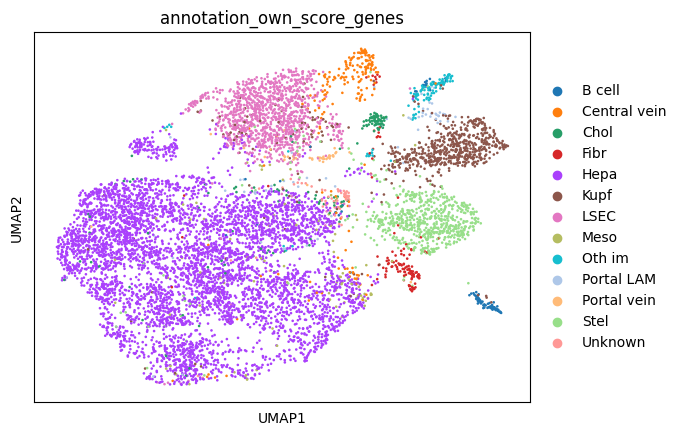

Hepa            60.103505
LSEC            13.290990
Kupf             7.986356
Stel             7.457069
Central vein     2.234768
Chol             1.811339
Fibr             1.505528
Oth im           1.317337
Meso             1.152670
B cell           1.117384
Portal LAM       0.823336
Unknown          0.717478
Portal vein      0.482239
Name: annotation_own_score_genes, dtype: float64
0.08233356857210068


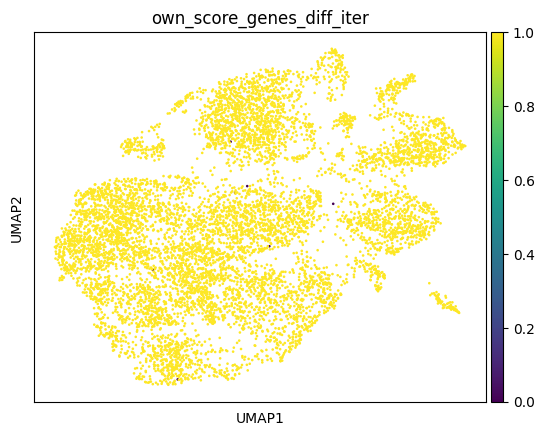

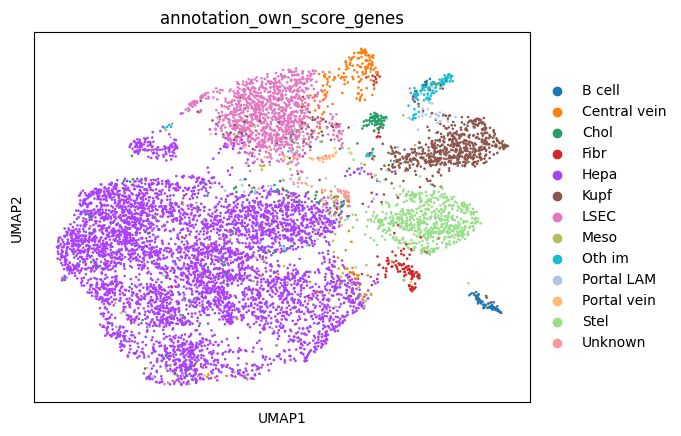

Hepa            60.068219
LSEC            13.279228
Kupf             8.009880
Stel             7.457069
Central vein     2.234768
Chol             1.846624
Fibr             1.493766
Oth im           1.305575
Meso             1.152670
B cell           1.117384
Portal LAM       0.835098
Unknown          0.717478
Portal vein      0.482239
Name: annotation_own_score_genes, dtype: float64
0.023523876734885908


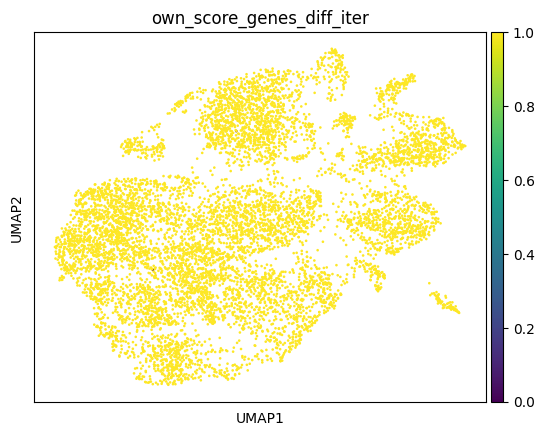

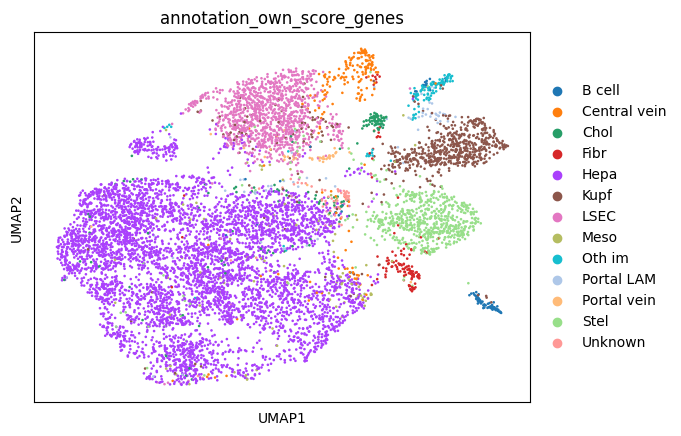

Hepa            60.079981
LSEC            13.267466
Kupf             8.021642
Stel             7.445307
Central vein     2.234768
Chol             1.846624
Fibr             1.493766
Oth im           1.305575
Meso             1.152670
B cell           1.117384
Portal LAM       0.835098
Unknown          0.717478
Portal vein      0.482239
Name: annotation_own_score_genes, dtype: float64
converged


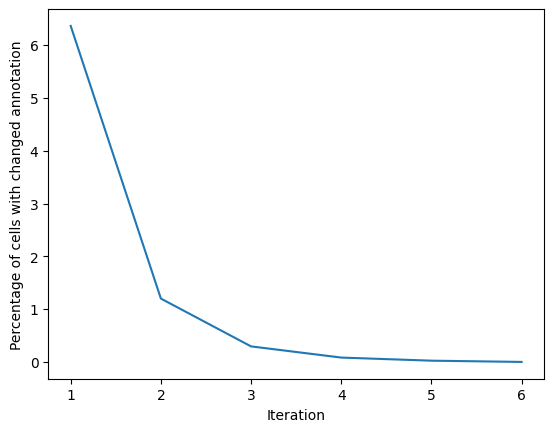

In [17]:
# Own score genes iterative
scores = own_score_genes_iterative(sdata.table,path_mg,nr_iterations=8,output_dir=OUTPUT_DIR,genes_not_in_var_names=['Grip1'])

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


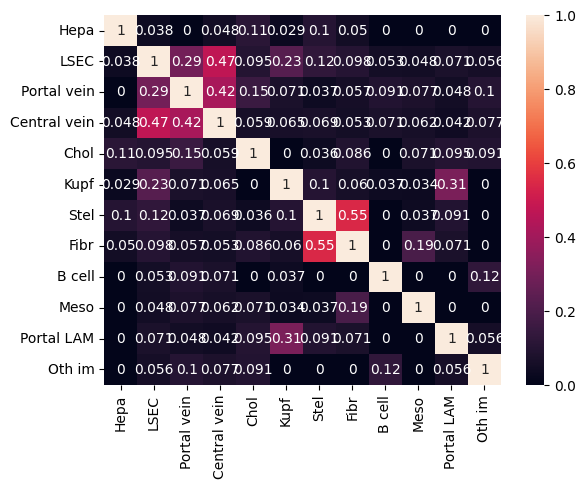

In [18]:
Jaccard_similarity_matrix(path_mg)

<AxesSubplot: >

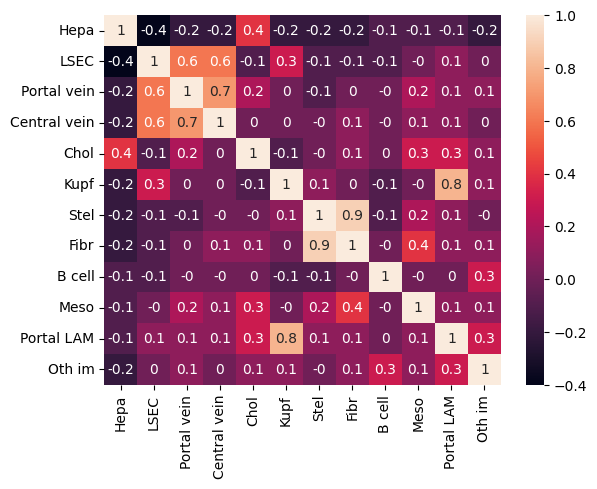

In [19]:
# plot correlation matrix of the features
sns.heatmap(np.round(scores.corr(method='pearson'),1), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

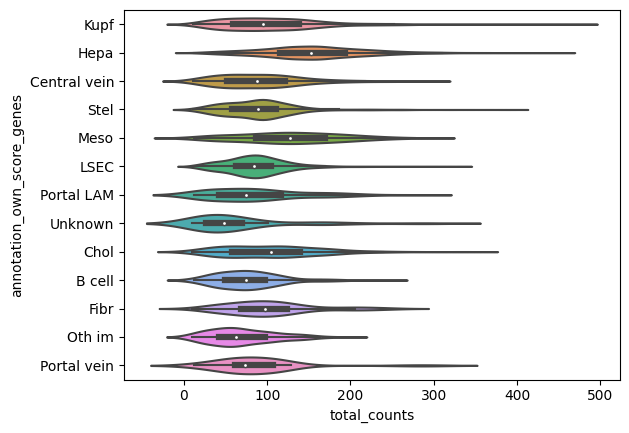

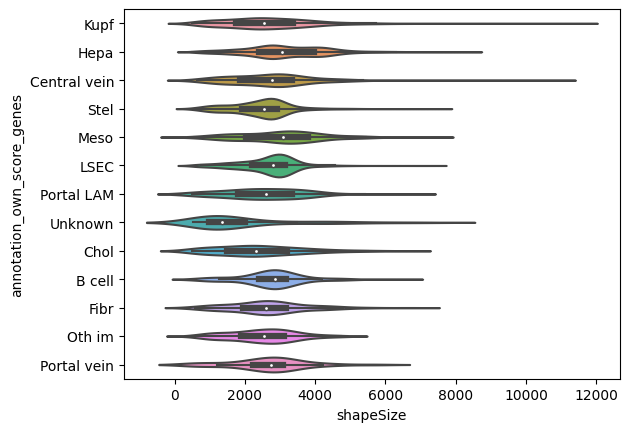

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

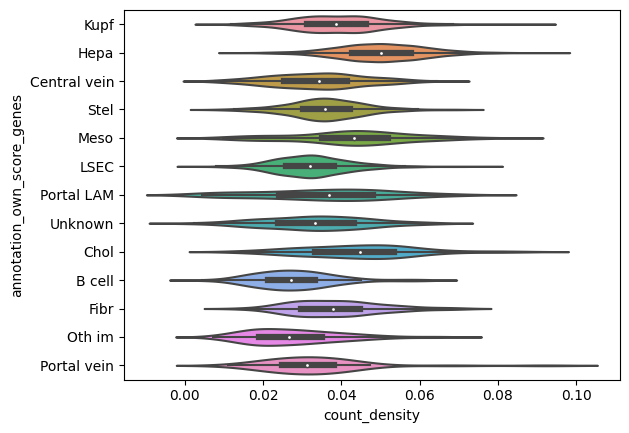

In [20]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

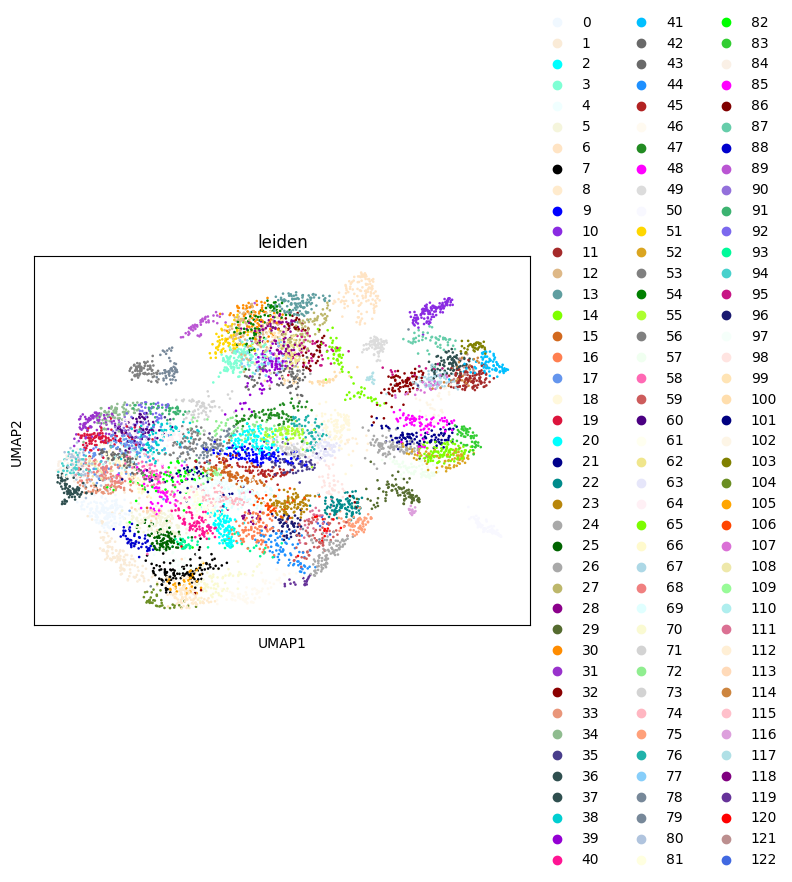

In [21]:
sc.tl.leiden(sdata.table,resolution=10,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Central vein', 'Chol', 'Fibr', 'Hepa', 'Kupf', 'LSEC',
       'Meso', 'Oth im', 'Portal LAM', 'Portal vein', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[0, 1, 2, 4, 5, 7, 8, 9, 15, 16, 17, 19, 20, 22, 23, 24, 25, 31, 33, 34, 35, 37, 38, 40, 42, 44, 45, 46, 53, 55, 56, 58, 59, 60, 61, 63, 64, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 88, 90, 91, 92, 93, 94, 96, 97, 98, 101, 104, 105, 106, 108, 109, 110, 111, 112, 113, 115, 118, 119, 120, 122]
Kupf
[11, 32, 36, 41, 67, 95, 103, 107, 114, 121]
LSEC
[3, 12, 13, 27, 28, 30, 39, 43, 51, 54, 62, 65, 77, 86, 89, 99]
Central vein
[6]
Portal vein
[100]
Fibr
[29, 116]
Stel
[14, 21, 26, 48, 52, 57, 83, 102]
Meso
[]
Chol
[49]
B cell
[50]
Oth im
[10]
Unknown
[18, 47, 117]
Portal LAM
[87]


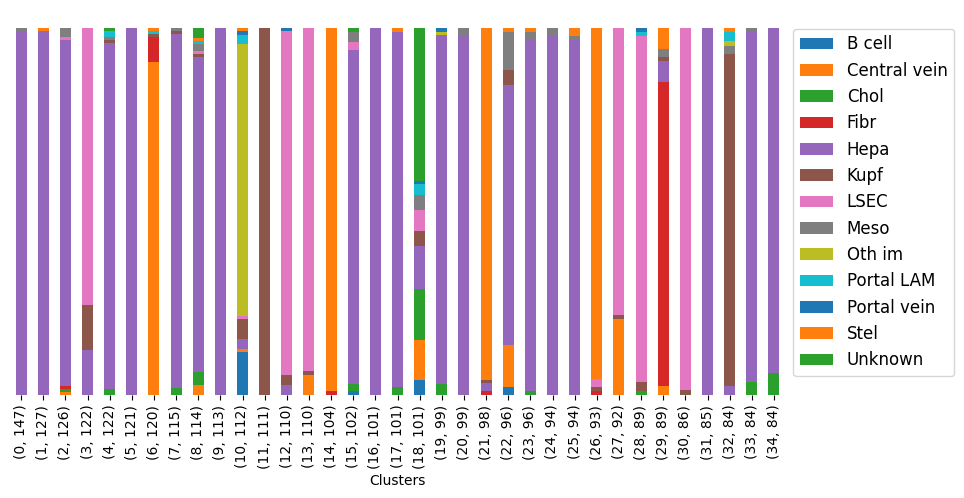

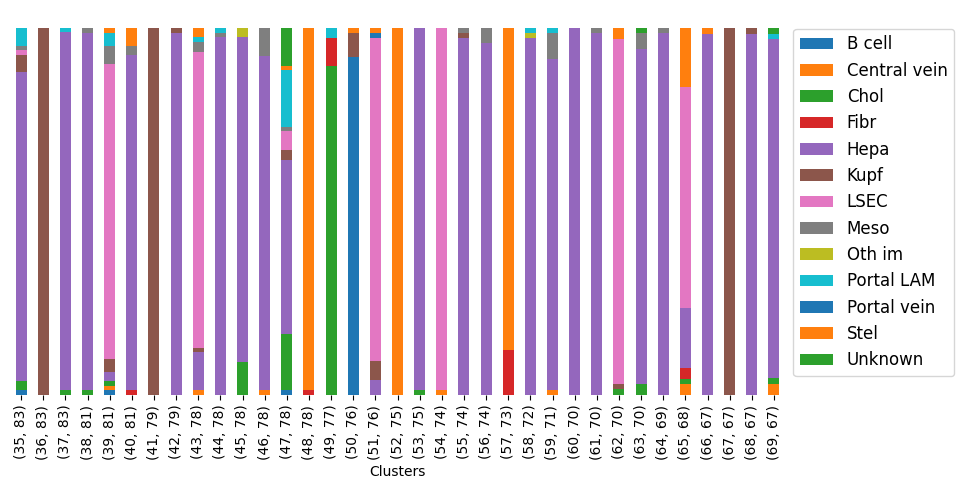

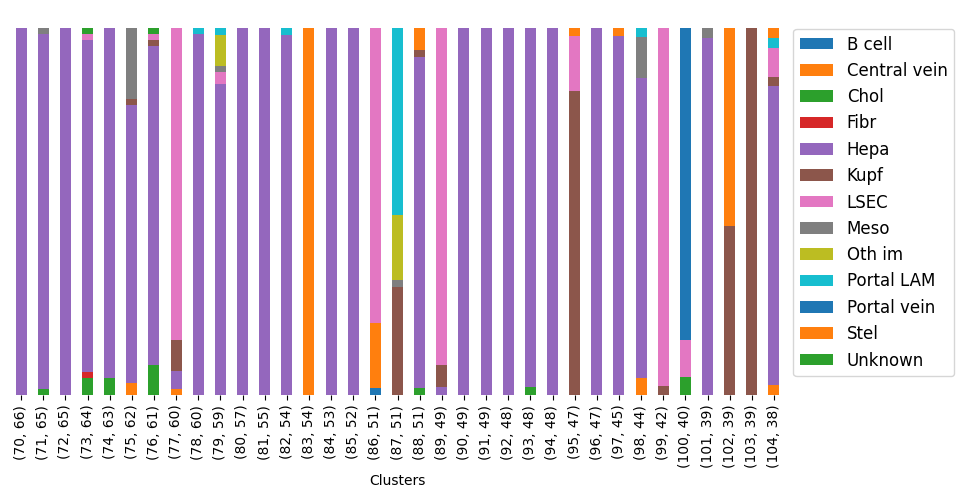

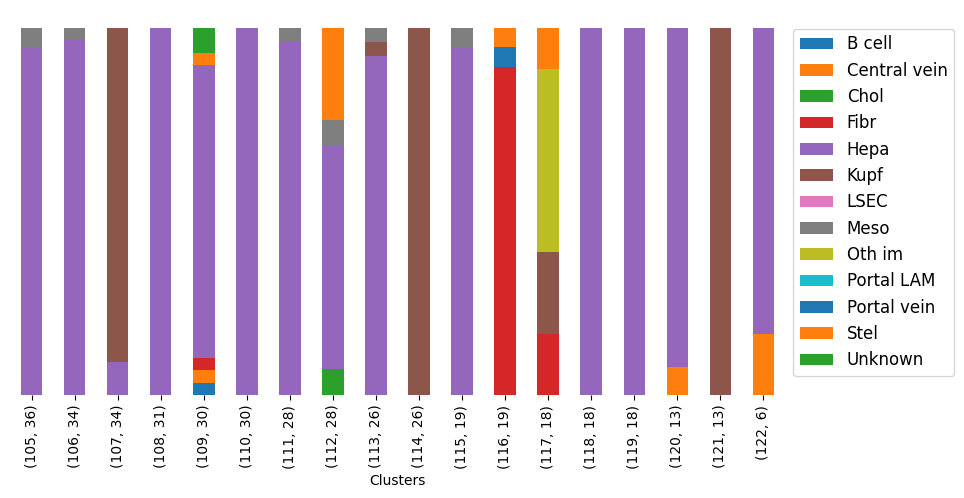

In [22]:
cell_types = ['Hepa','Kupf','LSEC','Central vein','Portal vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown','Portal LAM']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

In [23]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
print(sdata.table.obs['leiden_cell_types'].value_counts())


Hepa            5266
LSEC            1258
Stel             614
Kupf             583
Unknown          197
Central vein     120
Oth im           112
Fibr             108
Chol              77
B cell            76
Portal LAM        51
Portal vein       40
Name: leiden_cell_types, dtype: int64


40
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Fn1', 'Chol']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Sirpa', 'Portal LAM']]
Kupf
Maybe drop:[['Plpp1', 'Central vein'], ['Pecam1', 'B cell']]
Oth im
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vein']]
Portal LAM
Maybe drop:[['Cd9', 'Portal vein'], ['Spp1', 'Chol']]
Summary:
Hepa
Maybe drop:[['Glul', 'Central vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Central vein'], ['Plpp1', 'Portal vein'], ['Pecam1', 'B cell']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Sirpa', 'Portal LAM']]
Oth im
Maybe drop:[['Cd9', 'Central vein'], ['Cd9', 'Portal vei

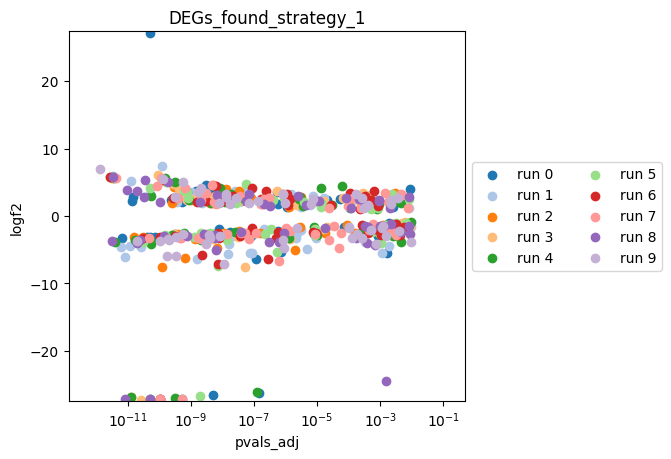

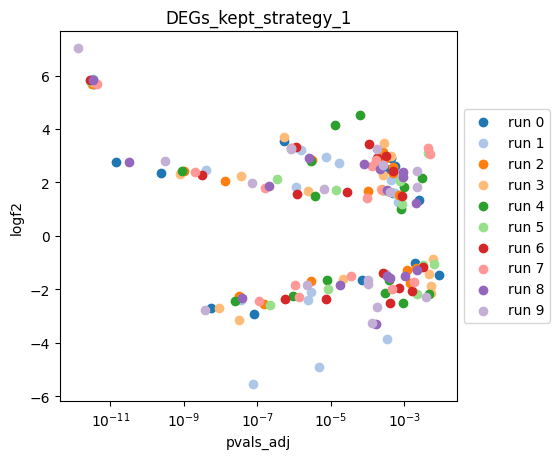

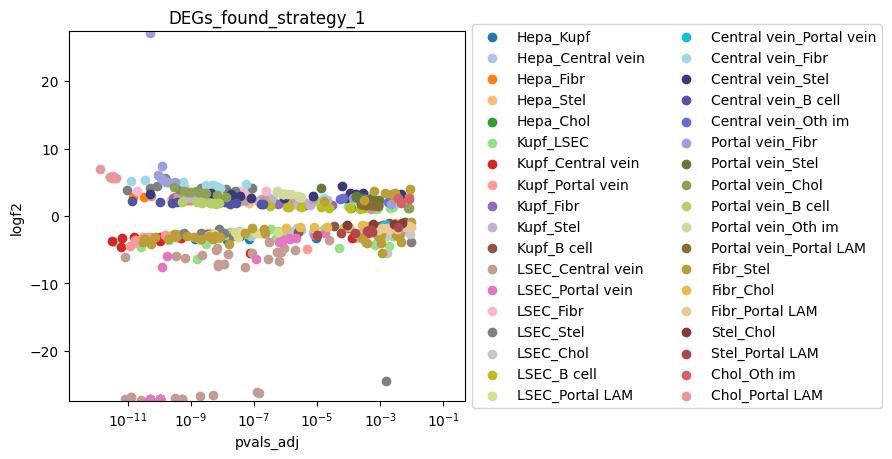

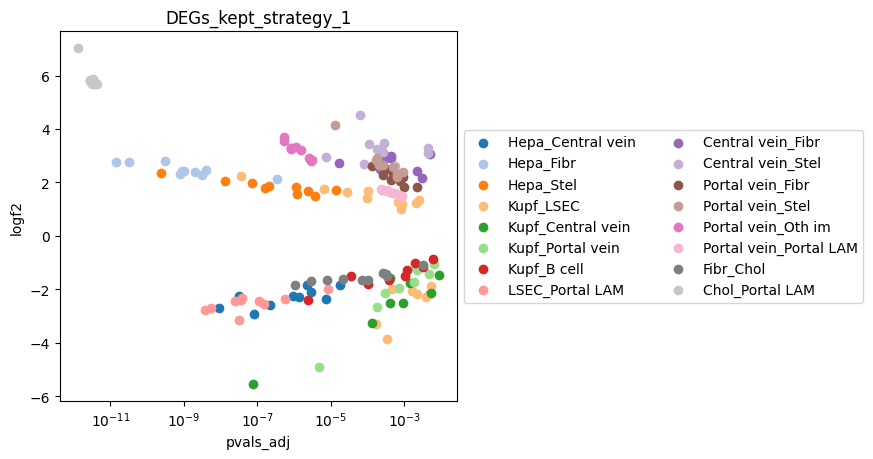

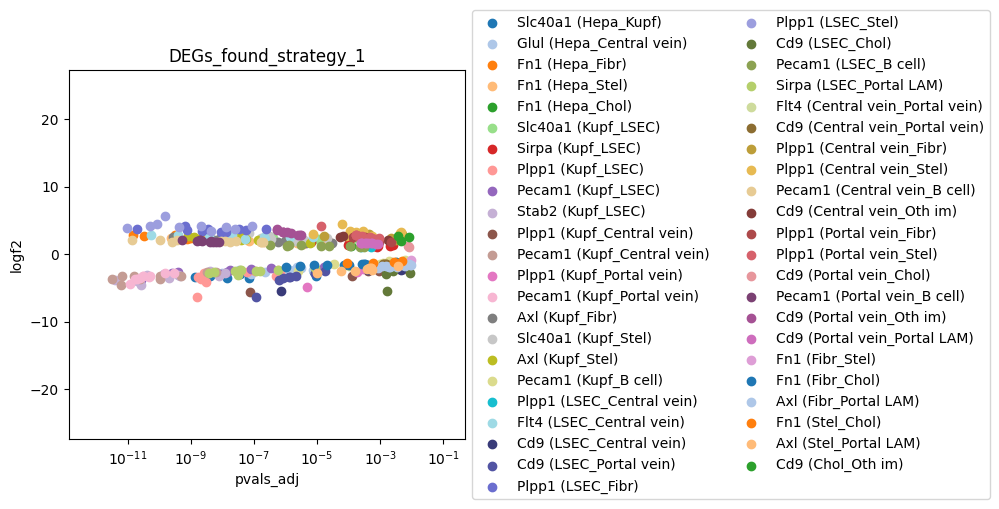

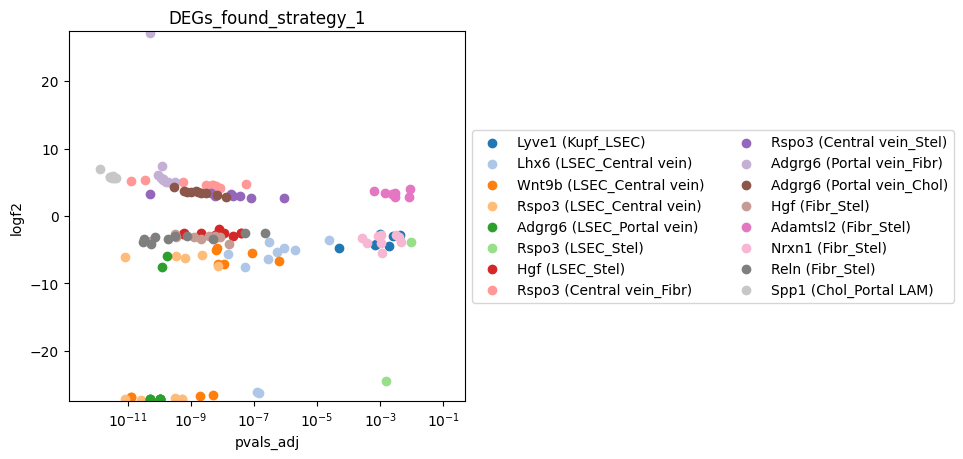

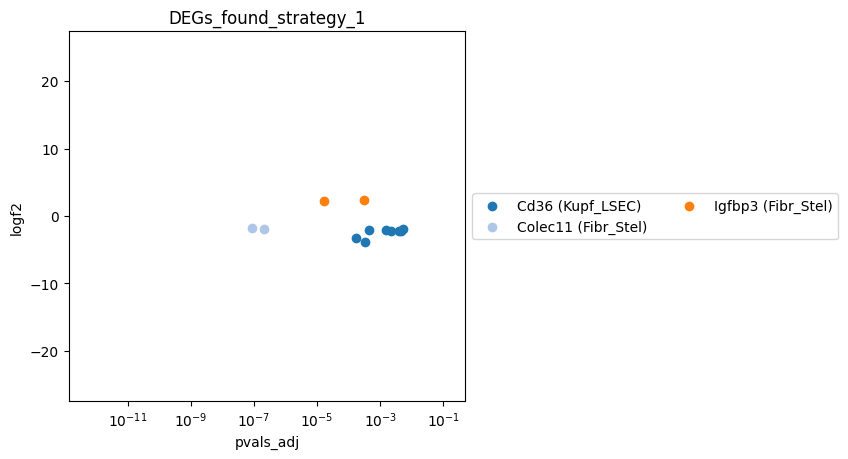

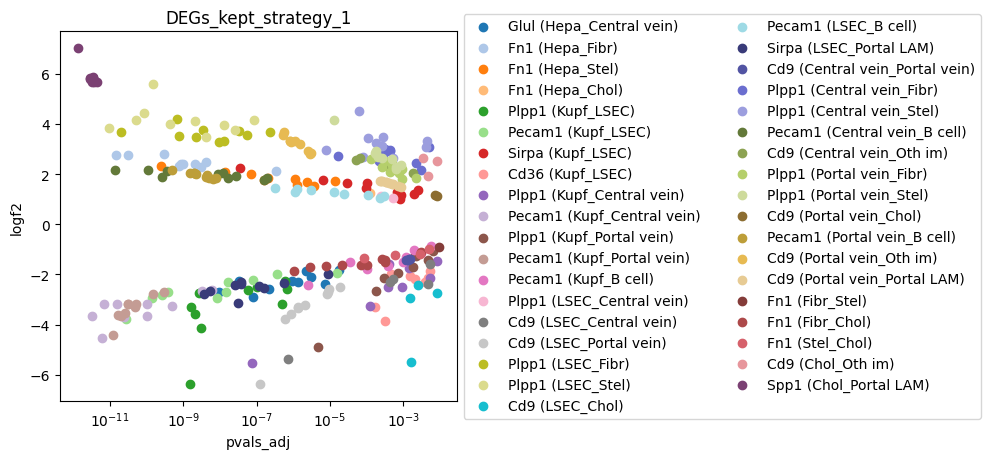

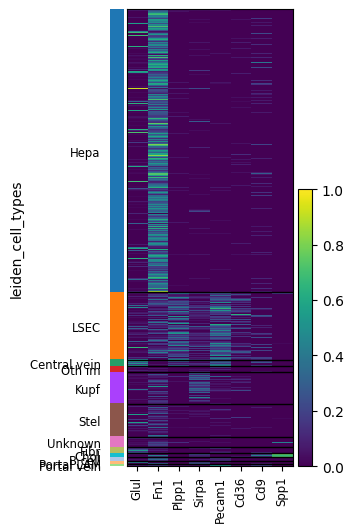

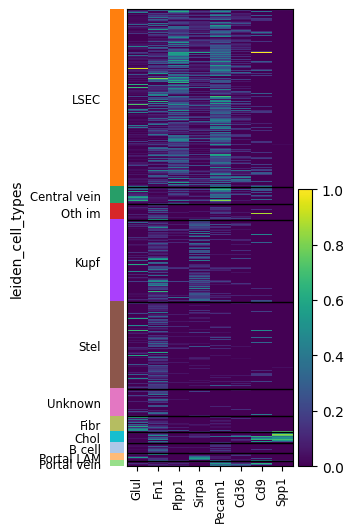

In [24]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,1,OUTPUT_DIR)

40
Cd36
Is marker gene of: ['LSEC', 'Kupf']
Could also be a marker gene of: ['Portal vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Oth im']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Fibr']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Central vein']
Gdf15
Is marker gene of: ['Kupf', 'Portal LAM']
Could also be a marker gene of: ['Portal vein']
Glul
Is marker gene of: ['Hepa', 'Central vein']
Could also be a marker gene of: ['Fibr']
Hal
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Portal vein']
Itgax
Is marker gene of: ['Oth im']
Could also be a marker gene of: ['Portal LAM']
Myh11
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr']
Ngfr
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Portal vein', 'B cell', 'Oth im']
Pck1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Portal vein', 'Chol

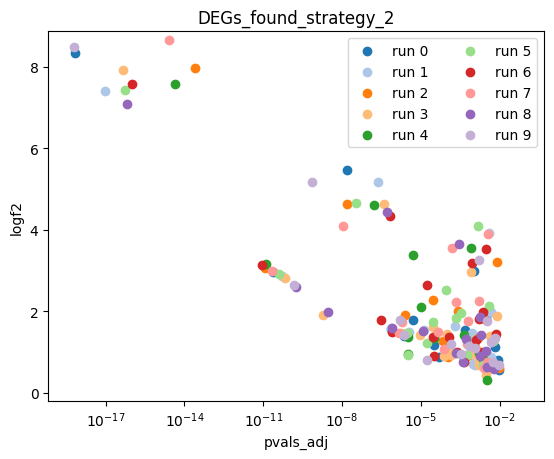

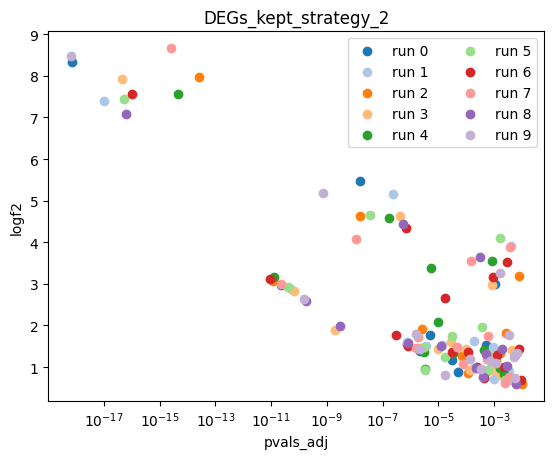

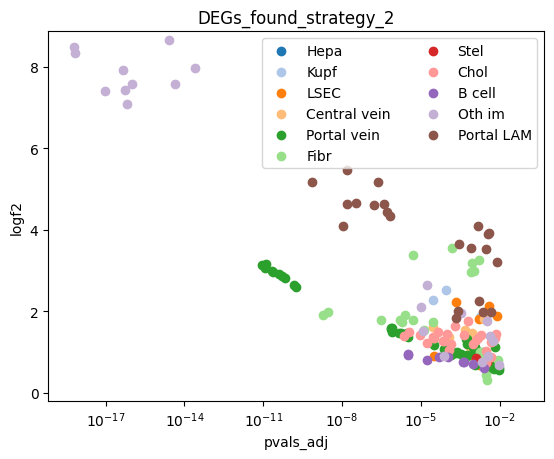

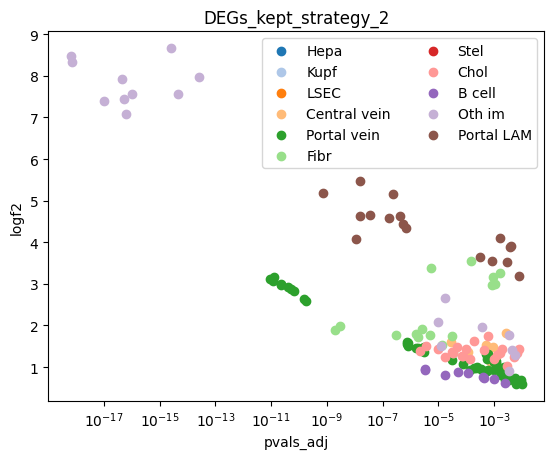

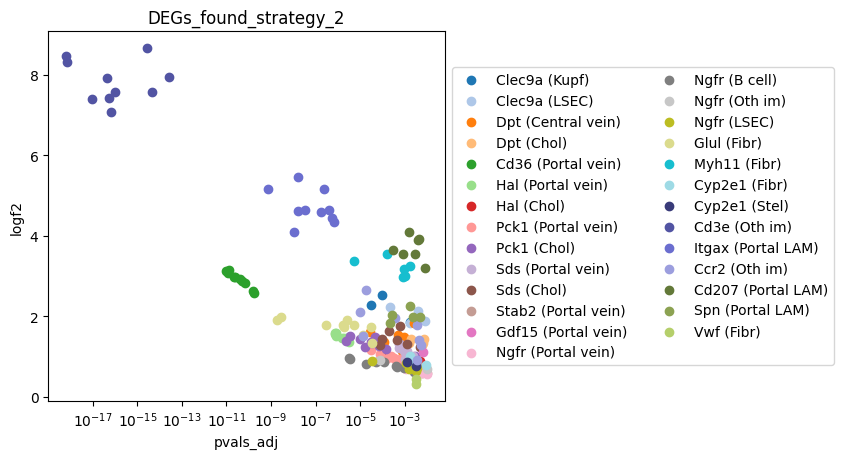

Dpt
Dpt
Cd36
Hal
Pck1
Pck1
Sds
Sds
Stab2
Glul
Myh11
Ngfr
Cd3e
Itgax
Ccr2
Cd207


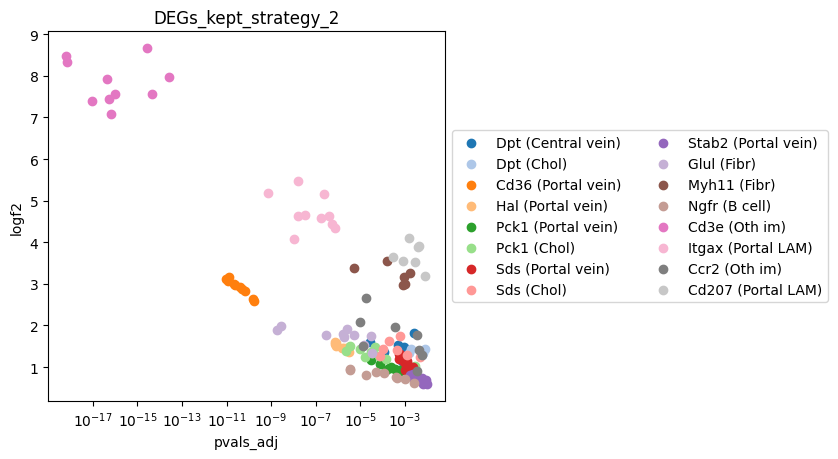

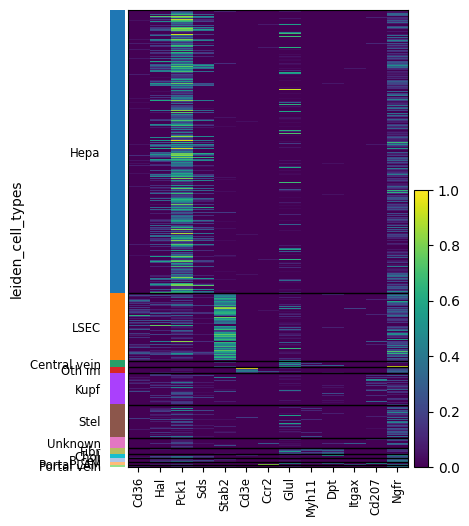

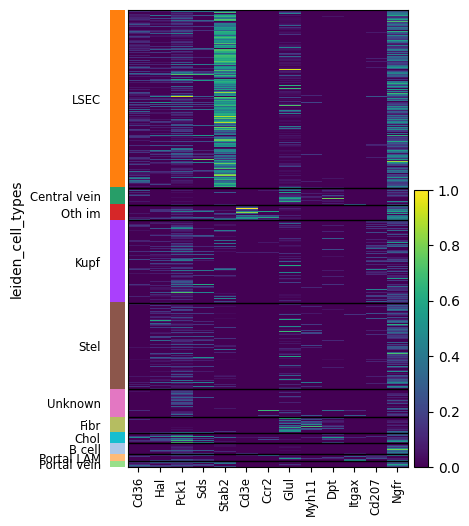

In [39]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,2,OUTPUT_DIR)

In [26]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
path_mg_mod_1_2 = OUTPUT_DIR + "/markerGeneListHL_othIm_endoSplit_portalLAM_modified_1_2.csv"
df_mg.to_csv(path_mg_mod_1_2)

Hepa             8.002
LSEC             8.333
Portal vein     11.000
Central vein     9.500
Chol            10.500
Kupf            19.000
Stel            14.501
Fibr            18.125
B cell           5.500
Meso             6.000
Portal LAM      14.500
Oth im           5.000
dtype: float64


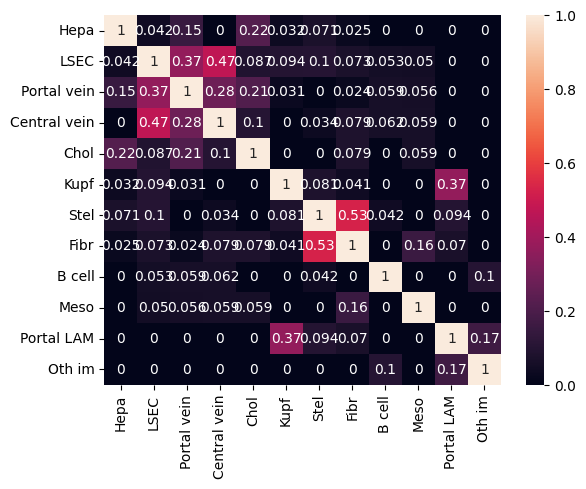

In [27]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

Hepa            63.067514
LSEC            12.573512
Stel             7.668784
Kupf             5.410492
Portal vein      1.893672
B cell           1.740767
Fibr             1.634909
Oth im           1.599624
Central vein     1.482004
Chol             1.282051
Meso             0.776288
Portal LAM       0.505763
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64


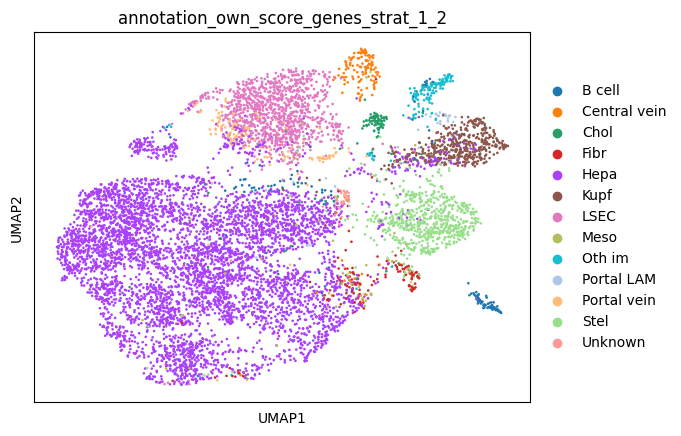

7.845212891084451


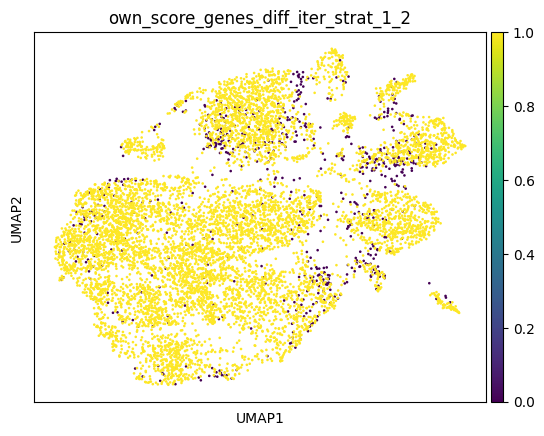

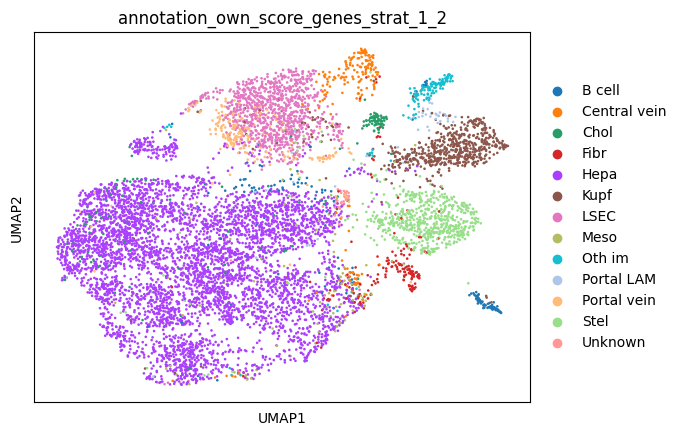

Hepa            58.962597
LSEC            11.773700
Stel             7.292402
Kupf             7.233592
Portal vein      2.669960
Central vein     2.164197
Fibr             2.070101
Chol             2.058339
B cell           1.987768
Oth im           1.529052
Meso             1.223242
Portal LAM       0.670430
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
2.0112914608327452


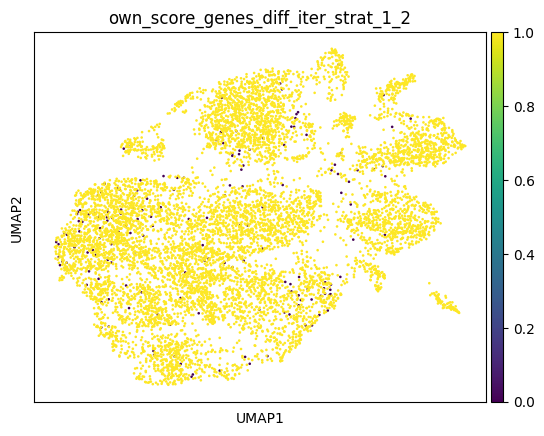

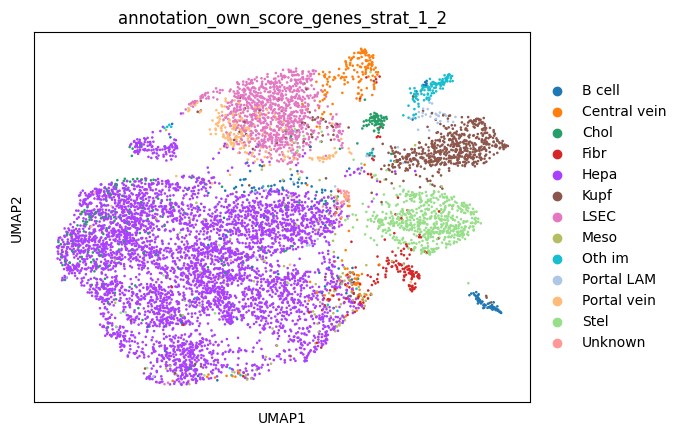

Hepa            57.492355
LSEC            11.573747
Kupf             7.551164
Stel             7.257116
Chol             2.881675
Portal vein      2.669960
Central vein     2.399435
Fibr             2.175959
B cell           1.999530
Oth im           1.529052
Meso             1.399671
Portal LAM       0.705716
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.9291931310279934


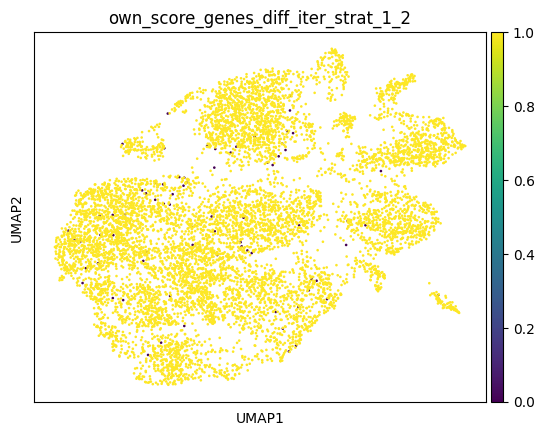

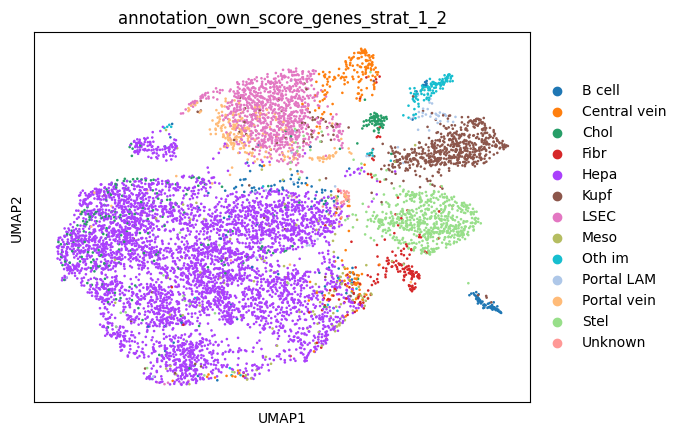

Hepa            56.751353
LSEC            11.538462
Kupf             7.598212
Stel             7.280640
Chol             3.352152
Portal vein      2.705246
Central vein     2.493531
Fibr             2.223006
B cell           1.987768
Oth im           1.540814
Meso             1.446718
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.44695365796283226


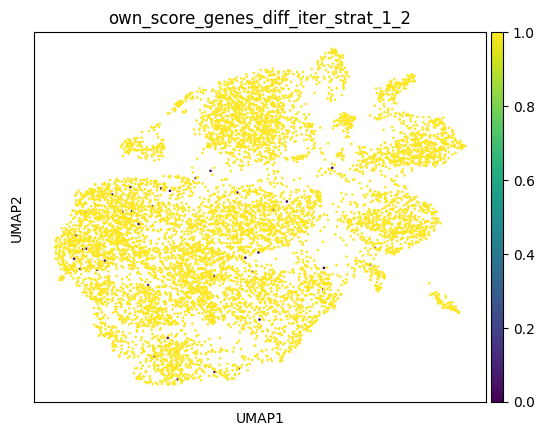

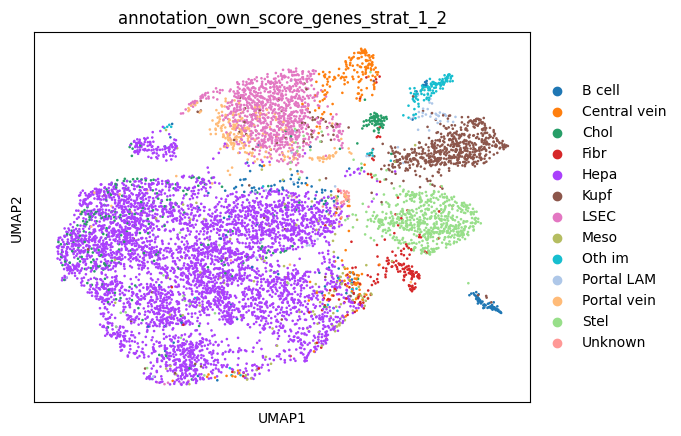

Hepa            56.363209
LSEC            11.538462
Kupf             7.621736
Stel             7.257116
Chol             3.634439
Portal vein      2.740532
Central vein     2.493531
Fibr             2.281816
B cell           1.987768
Oth im           1.552576
Meso             1.446718
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.16466713714420136


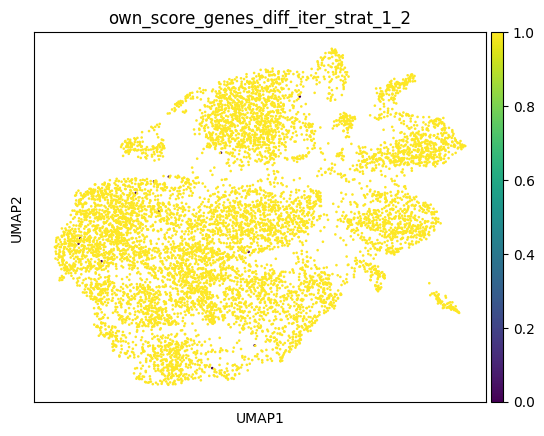

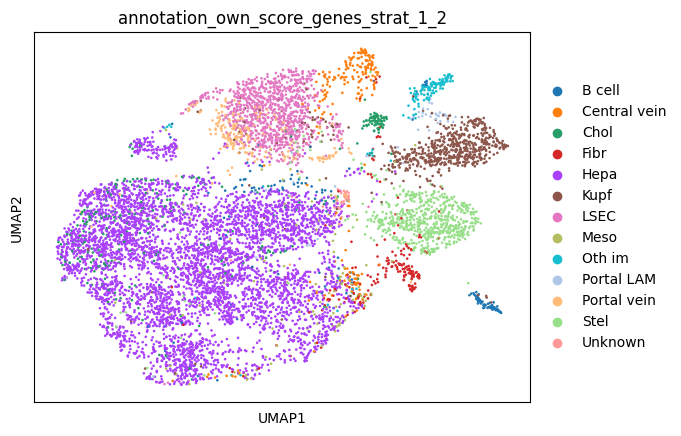

Hepa            56.222065
LSEC            11.526700
Kupf             7.633498
Stel             7.257116
Chol             3.752058
Portal vein      2.740532
Central vein     2.505293
Fibr             2.305340
B cell           1.987768
Oth im           1.540814
Meso             1.446718
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.08233356857210068


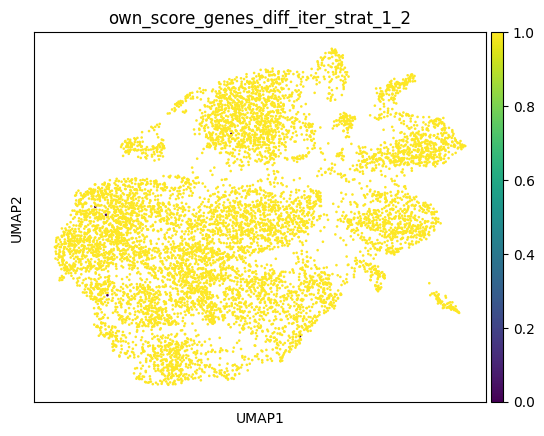

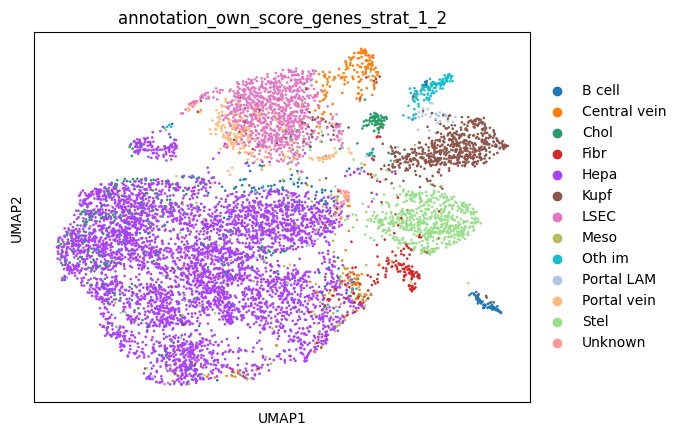

Hepa            56.151494
LSEC            11.514938
Kupf             7.633498
Stel             7.257116
Chol             3.810868
Portal vein      2.752294
Central vein     2.505293
Fibr             2.317102
B cell           1.987768
Oth im           1.540814
Meso             1.446718
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.08233356857210068


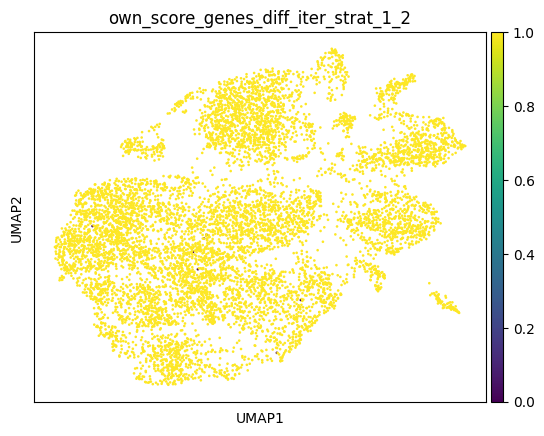

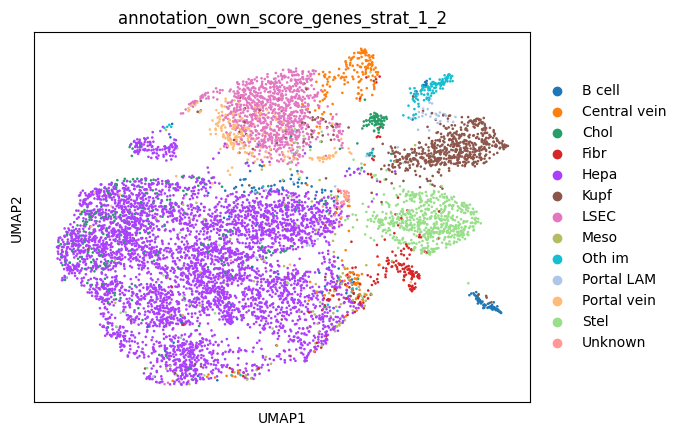

Hepa            56.092684
LSEC            11.514938
Kupf             7.633498
Stel             7.257116
Chol             3.869678
Portal vein      2.752294
Central vein     2.493531
Fibr             2.328864
B cell           1.976006
Oth im           1.540814
Meso             1.458480
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64
0.011761938367442954


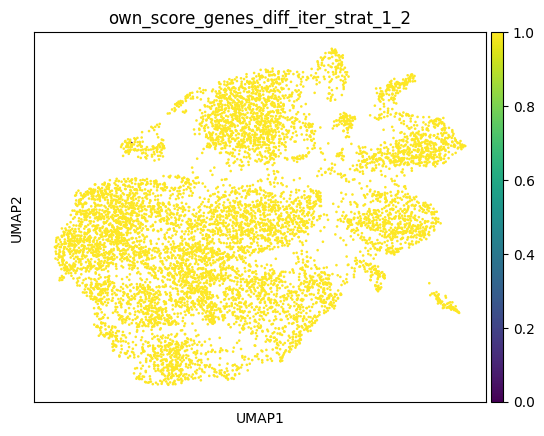

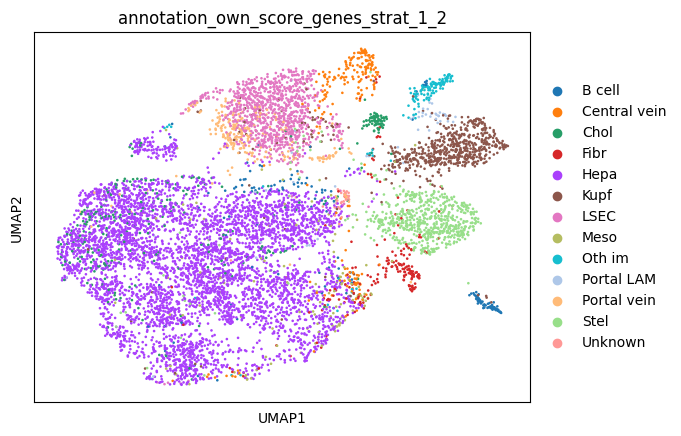

Hepa            56.080922
LSEC            11.514938
Kupf             7.633498
Stel             7.257116
Chol             3.881440
Portal vein      2.752294
Central vein     2.493531
Fibr             2.328864
B cell           1.976006
Oth im           1.540814
Meso             1.458480
Portal LAM       0.717478
Unknown          0.364620
Name: annotation_own_score_genes_strat_1_2, dtype: float64


Hepa       LSEC  Portal vein  Central vein      Chol      Kupf  \
0    -0.284199  -2.811859          NaN           NaN       NaN  7.679707   
1     4.304488  -3.328192     0.066167     -3.441703  2.821063 -2.320390   
2          NaN        NaN          NaN     -3.879182       NaN -5.666006   
3     2.086425  -3.509897    -2.072426     -3.667826  1.279538 -5.738232   
4     0.057849  -2.303437          NaN     -3.647548       NaN -5.286413   
...        ...        ...          ...           ...       ...       ...   
8497  0.685556  -1.829818          NaN           NaN -2.420950 -4.666783   
8498  6.338914        NaN          NaN           NaN  2.765147       NaN   
8499       NaN  21.254457     8.800049     18.506384       NaN  0.952837   
8500  0.127313  -1.947347          NaN           NaN       NaN -3.137434   
8501  9.301999        NaN    -2.383958           NaN  1.233063       NaN   

           Stel       Fibr    B cell      Meso  Portal LAM  Oth im  
0     -3.016765  -5.260960 -1.779424       NaN   -2.766979     NaN  
1           NaN        NaN -2.305532       NaN   -1.760405     NaN  
2           NaN  -5.266811       NaN       NaN         NaN     NaN  
3     -4.090842  -5.268937 -1.756326       NaN   -5.124398     NaN  
4      5.549501   1.175506 -1.960746       NaN         NaN     NaN  
...         ...        ...       ...       ...         ...     ...  
8497  14.791970   8.093439  0.302752       NaN   -4.818253     NaN  
8498  -3.103989  -4.608311 -1.653983       NaN   -5.018864     NaN  
8499  -3.777053  -5.400971  0.187841  0.686746   -1.188440     NaN  
8500  22.637794  13.160821       NaN       NaN   -2.671869     NaN  
8501        NaN        NaN       NaN       NaN         NaN     NaN  

[8502 rows x 12 columns]

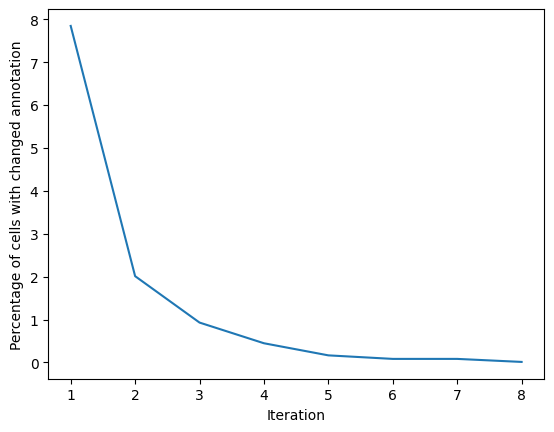

In [29]:
# Own score genes iterative with basic marker gene list updated with strategy 1 and 2
own_score_genes_iterative(sdata.table,path_mg_mod_1_2,nr_iterations=8,suffix='_strat_1_2',output_dir=OUTPUT_DIR,genes_not_in_var_names=['Grip1'])

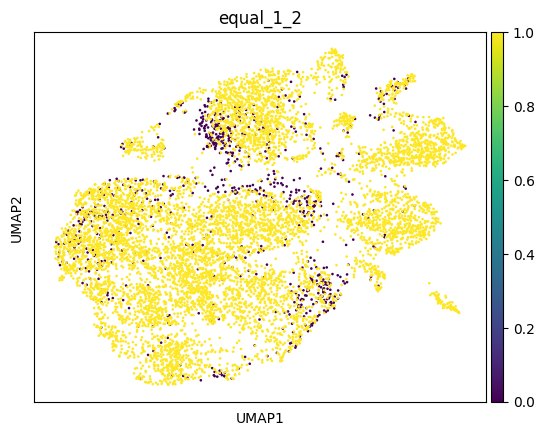

In [30]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

In [31]:
sdata.table.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'annotation_own_score_genes_start_iterative',
       'annotation_own_score_genes', 'count_density', 'leiden_cell_types',
       'score_celltype_own_score_genes_strat_1_2',
       'second_score_celltype_own_score_genes_strat_1_2',
       'cleanliness_own_score_genes_strat_1_2',
       'annotation_own_score_genes_start_iterative_strat_1_2',
       'annotation_own_score_genes_strat_1_2', 'equal_1_2'],
      dtype='object')

In [32]:
sdata.table.write_h5ad(OUTPUT_DIR+'/'+name_anndata+'_it_score_genes.h5ad')